In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Read the data

data = pd.read_csv("LoanApprovalPrediction.csv")
data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [10]:
# Check for missing values
data.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            598 non-null    object 
 1   Gender             598 non-null    object 
 2   Married            598 non-null    object 
 3   Dependents         586 non-null    float64
 4   Education          598 non-null    object 
 5   Self_Employed      598 non-null    object 
 6   ApplicantIncome    598 non-null    int64  
 7   CoapplicantIncome  598 non-null    float64
 8   LoanAmount         577 non-null    float64
 9   Loan_Amount_Term   584 non-null    float64
 10  Credit_History     549 non-null    float64
 11  Property_Area      598 non-null    object 
 12  Loan_Status        598 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 60.9+ KB


In [12]:
# Check Categorical Variables

obj = (data.dtypes == 'object')
print("Categorical variables:", len(list(obj[obj].index)))

Categorical variables: 7


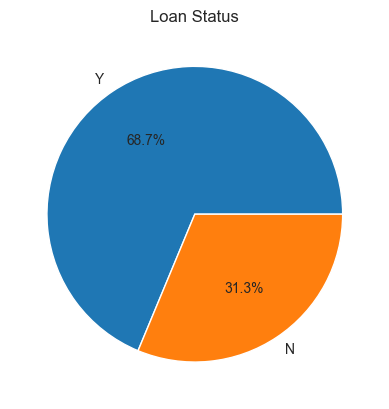

In [13]:
# Count the occurrences of each label
temp = data['Loan_Status'].value_counts()

plt.pie(temp.values, labels=temp.index, autopct='%1.1f%%')
plt.title('Loan Status')

plt.show()

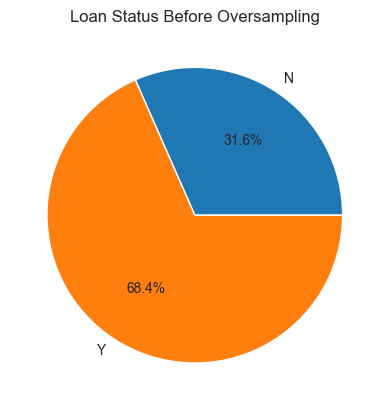

Class distribution before oversampling in the training set: Counter({'Y': 327, 'N': 151})


ValueError: could not convert string to float: 'LP002602'

In [14]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter

##### RESAMPLING

X = data.drop(['Loan_Status'], axis=1)
Y = data['Loan_Status']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=11)

temp_before = Counter(Y_train)
plt.pie(temp_before.values(), labels=temp_before.keys(), autopct='%1.1f%%')
plt.title('Loan Status Before Oversampling')
plt.show()

print("Class distribution before oversampling in the training set:", Counter(Y_train))

# Apply SMOTE to oversample the minority class in the training set
smote = SMOTE(sampling_strategy='auto', random_state=42)

X_train, Y_train = smote.fit_resample(X_train, Y_train)

# Display the class distribution after oversampling in the training set
temp_after = Counter(Y_train)
plt.pie(temp_after.values(), labels=temp_after.keys(), autopct='%1.1f%%')
plt.title('Loan Status After Oversampling')
plt.show()

print("Class distribution after oversampling in the training set:", Counter(Y_train))

# Now you can use X_resampled and Y_resampled for training your machine learning model


In [ ]:
# Dropping Loan_ID column 
data.drop(['Loan_ID'],axis=1,inplace=True)

In [ ]:
missing_values = data.isnull().sum()

# Display the count of missing values for each column
print("Missing Values:")
print(missing_values)

In [ ]:
obj = (data.dtypes == 'object') 
object_cols = list(obj[obj].index) 
plt.figure(figsize=(18,36)) 
index = 1

for col in object_cols:
  y = data[col].value_counts() 
  plt.subplot(5,5,index) 
  plt.xticks(rotation=90)
  sns.barplot(x=list(y.index), y=y) 
  sns.title = col
  index +=1

In [ ]:
sns.catplot(x="Gender", y="Married", 
			hue="Loan_Status", 
			kind="bar",
			data=data)

In [ ]:
plt.subplots(figsize=(15, 5))
for i, col in enumerate(['Gender', 'Married']):
    plt.subplot(1, 2, i+1)
    sns.countplot(data=data, x=col, hue='Loan_Status')
plt.tight_layout()
plt.show()

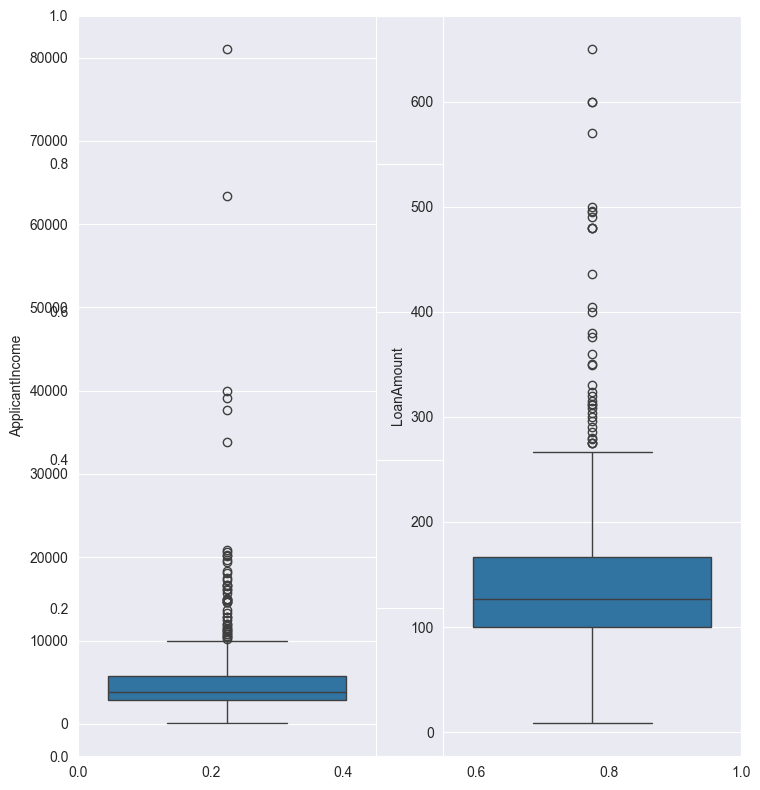

In [15]:
plt.subplots(figsize=(8, 8))
for i, col in enumerate(['ApplicantIncome', 'LoanAmount']):
    plt.subplot(1, 2, i+1)
    sns.boxplot(data[col])
plt.tight_layout()
plt.show()